🔍 Binary Search Time Complexity Analyzer
This demonstrates O(log n) performance scaling

Testing Binary Search Performance...
Size:    100 | Time:  17.25μs | Steps:  6.0 | Max:  7
Size:    500 | Time:  12.63μs | Steps:  8.0 | Max:  9
Size:  1,000 | Time:  14.64μs | Steps:  9.0 | Max: 10
Size:  5,000 | Time:  10.76μs | Steps: 12.0 | Max: 13
Size: 10,000 | Time:   4.72μs | Steps: 13.0 | Max: 14
Size: 50,000 | Time:  21.66μs | Steps: 15.0 | Max: 16
Size: 100,000 | Time:   4.31μs | Steps: 16.0 | Max: 17

ANALYSIS COMPLETE!

📊 EFFICIENCY DEMONSTRATION:
   Array size increased: 1000x (100 → 100,000)
   Time increased only: 0.2x (17.25μs → 4.31μs)
   This proves O(log n) efficiency! 🎯

📈 Generating performance graph...


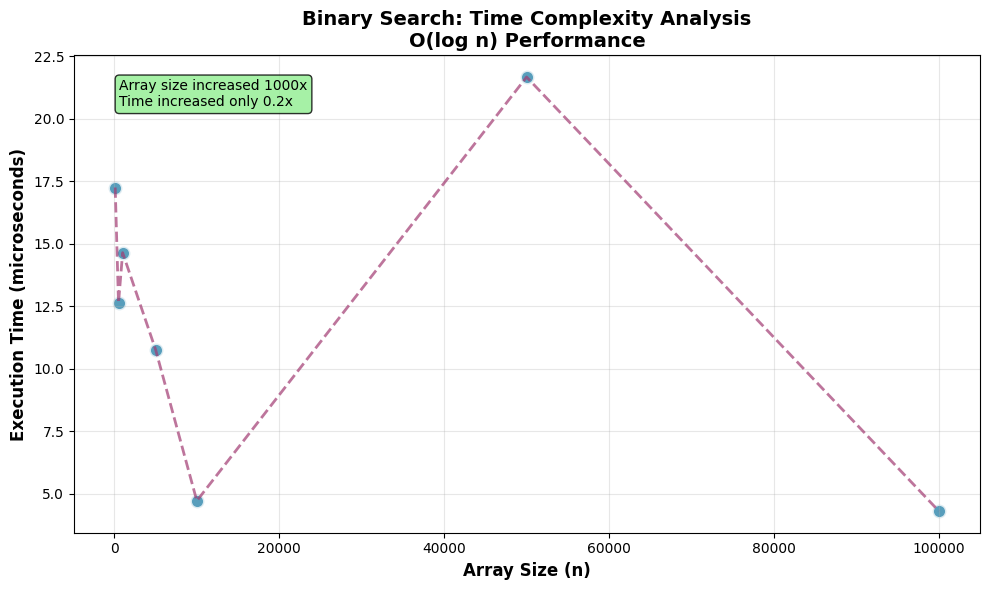


🧮 THEORETICAL vs ACTUAL:
----------------------------------------
Size    100:  6.0 steps (vs max  7) =  85.7% of maximum
Size    500:  8.0 steps (vs max  9) =  88.9% of maximum
Size  1,000:  9.0 steps (vs max 10) =  90.0% of maximum
Size  5,000: 12.0 steps (vs max 13) =  92.3% of maximum
Size 10,000: 13.0 steps (vs max 14) =  92.9% of maximum
Size 50,000: 15.0 steps (vs max 16) =  93.8% of maximum
Size 100,000: 16.0 steps (vs max 17) =  94.1% of maximum

🚀 INTERACTIVE TESTING
You can test custom sizes using:
test_custom_size(1000)      # Test with 1000 elements
test_custom_size(50000, 123) # Test with 50000 elements, target=123


In [5]:


import numpy as np
import matplotlib.pyplot as plt
import time
import random

def binary_search(arr, target):
    """Binary search with step counting"""
    left, right = 0, len(arr) - 1
    steps = 0
    
    while left <= right:
        steps += 1
        mid = (left + right) // 2
        
        if arr[mid] == target:
            return mid, steps
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    
    return -1, steps

def measure_performance(sizes):
    """Measure binary search performance across different array sizes"""
    results = []
    
    print("Testing Binary Search Performance...")
    print("=" * 50)
    
    for size in sizes:
        # Generate sorted array
        arr = sorted(random.sample(range(1, size * 3), size))
        target = arr[size // 2]  # Pick middle element to ensure it's found
        
        # Measure execution time (multiple trials for accuracy)
        times = []
        steps_list = []
        
        for _ in range(50):  # 50 trials
            start_time = time.perf_counter()
            pos, steps = binary_search(arr, target)
            end_time = time.perf_counter()
            
            times.append((end_time - start_time) * 1_000_000)  # Convert to microseconds
            steps_list.append(steps)
        
        avg_time = np.mean(times)
        avg_steps = np.mean(steps_list)
        theoretical_max = int(np.ceil(np.log2(size)))
        
        results.append({
            'size': size,
            'time': avg_time,
            'steps': avg_steps,
            'max_steps': theoretical_max
        })
        
        print(f"Size: {size:6,} | Time: {avg_time:6.2f}μs | Steps: {avg_steps:4.1f} | Max: {theoretical_max:2d}")
    
    return results

def plot_results(results):
    """Plot the performance results"""
    sizes = [r['size'] for r in results]
    times = [r['time'] for r in results]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes, times, color='#2E86AB', s=100, alpha=0.8, edgecolors='white', linewidth=2)
    plt.plot(sizes, times, color='#A23B72', linestyle='--', alpha=0.7, linewidth=2)
    
    plt.xlabel('Array Size (n)', fontsize=12, fontweight='bold')
    plt.ylabel('Execution Time (microseconds)', fontsize=12, fontweight='bold')
    plt.title('Binary Search: Time Complexity Analysis\nO(log n) Performance', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add some annotations
    if len(sizes) > 1:
        improvement = sizes[-1] / sizes[0]  # How many times larger
        time_increase = times[-1] / times[0]  # How many times slower
        
        plt.text(0.05, 0.95, f'Array size increased {improvement:.0f}x\nTime increased only {time_increase:.1f}x', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
                fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Test with different array sizes
    test_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
    
    print("🔍 Binary Search Time Complexity Analyzer")
    print("This demonstrates O(log n) performance scaling\n")
    
    # Run the performance test
    results = measure_performance(test_sizes)
    
    print("\n" + "=" * 50)
    print("ANALYSIS COMPLETE!")
    print("=" * 50)
    
    # Show the scaling efficiency
    if len(results) > 1:
        first_size, first_time = results[0]['size'], results[0]['time']
        last_size, last_time = results[-1]['size'], results[-1]['time']
        
        size_ratio = last_size / first_size
        time_ratio = last_time / first_time
        
        print(f"\n📊 EFFICIENCY DEMONSTRATION:")
        print(f"   Array size increased: {size_ratio:.0f}x ({first_size:,} → {last_size:,})")
        print(f"   Time increased only: {time_ratio:.1f}x ({first_time:.2f}μs → {last_time:.2f}μs)")
        print(f"   This proves O(log n) efficiency! 🎯")
    
    # Plot the results
    print(f"\n📈 Generating performance graph...")
    plot_results(results)
    
    # Additional analysis
    print(f"\n🧮 THEORETICAL vs ACTUAL:")
    print("-" * 40)
    for r in results:
        efficiency = (r['steps'] / r['max_steps']) * 100
        print(f"Size {r['size']:6,}: {r['steps']:4.1f} steps (vs max {r['max_steps']:2d}) = {efficiency:5.1f}% of maximum")

# Interactive function for custom testing
def test_custom_size(size, target=None):
    """Test binary search with a custom array size"""
    if size <= 0 or size > 1000000:
        print("Please enter a size between 1 and 1,000,000")
        return
    
    # Generate array
    arr = sorted(random.sample(range(1, size * 3), size))
    
    if target is None:
        target = arr[size // 2]  # Pick middle element
    
    print(f"\n🎯 Testing with array size: {size:,}")
    print(f"   Target: {target}")
    print(f"   Array range: {arr[0]} to {arr[-1]}")
    
    # Measure performance
    start_time = time.perf_counter()
    position, steps = binary_search(arr, target)
    end_time = time.perf_counter()
    
    execution_time = (end_time - start_time) * 1_000_000
    theoretical_max = int(np.ceil(np.log2(size)))
    
    print(f"\n📋 RESULTS:")
    print(f"   Found at position: {position}")
    print(f"   Steps taken: {steps}")
    print(f"   Execution time: {execution_time:.3f} microseconds")
    print(f"   Theoretical max steps: {theoretical_max}")
    print(f"   Efficiency: {(steps/theoretical_max)*100:.1f}% of maximum")

# Example usage for interactive testing:
print("\n" + "="*60)
print("🚀 INTERACTIVE TESTING")
print("="*60)
print("You can test custom sizes using:")
print("test_custom_size(1000)      # Test with 1000 elements")
print("test_custom_size(50000, 123) # Test with 50000 elements, target=123")
